In [3]:
import sympy as sym #used for symbol work in linear algebra
sym.init_printing()
import random #used for creating random situations and following probabilities
import pandas as pd #used to combine two lists easily
import matplotlib.pyplot as plt #used for graphing
%matplotlib inline

In [9]:
class troop_type():
    '''
    A class that defines the maximum service of the troops, the amount of that troop
    '''
    def __init__(self, chance_of_retire, quantity, alliance, name): #assigning attributes to the troops specifically
        self.chance_of_retire = chance_of_retire
        self.quantity = quantity
        self.alliance = alliance
        self.name = name
    def __repr__(self):
        return self.name

In [10]:
#defines the numbers of each troop, 1/expected years of service, number of soldiers in thousands
neutral = []

#add troop types below if neccessary or wanted

checkingresp = input("Would you like to input your own quantities? ") #User input for adjusting the circumstances of the battle
if checkingresp == "yes":
    impresp = int(input("Give a number of Imperial Soldiers: "))
    storesp = int(input("Give a number of Storm Troopers: "))
    sithresp = int(input("Give a number of Sith Lords: "))
    jediresp = int(input("Give a number of Jedi: "))
    neutral.append(troop_type(0.000091324, impresp, "empire", "Imperial"))
    neutral.append(troop_type(0.000091324, storesp, "empire", "Storm"))
    neutral.append(troop_type(0.000034246, sithresp, "empire", "Sith"))
    neutral.append(troop_type(0.000054794, jediresp, "rebellion", "Jedi"))
    imperial = troop_type(0.000091324, impresp, "empire", "Imperial")
    storm = troop_type(0.000091324, storesp, "empire", "Storm")
    sith = troop_type(0.000034246, sithresp, "empire", "Sith")
    jedi = troop_type(0.000054794, jediresp, "rebellion", "Jedi")
else:
    print("Default troop sizes selected.")
    neutral.append(troop_type(0.000091324, 20345, "empire", "Imperial"))
    neutral.append(troop_type(0.000091324, 500, "empire", "Storm"))
    neutral.append(troop_type(0.000034246, 2, "empire", "Sith"))
    neutral.append(troop_type(0.000054794, 100, "rebellion", "Jedi"))
    imperial = troop_type(0.000091324, 20345, "empire", "Imperial")
    storm = troop_type(0.000091324, 500, "empire", "Storm")
    sith = troop_type(0.000034246, 2, "empire", "Sith")
    jedi = troop_type(0.000054794, 100, "rebellion", "Jedi")

#These are set at 0 and will increase instead of decrease when they lose a battle to count the number needed
neutral.append(troop_type(0.000091324, 0, "rebellion", "Rebel"))
neutral.append(troop_type(0.000182648, 0, "rebellion", "Clone"))
rebel = troop_type(0.000091324, 0, "rebellion", "Rebel")
clone = troop_type(0.000182648, 0, "rebellion", "Clone")

neutral

Would you like to input your own quantities? 
Default troop sizes selected.


[Imperial, Storm, Sith, Jedi, Rebel, Clone]

In [11]:
#assigns the troops to the relevant listt either empire or rebels
empire = []
rebels = []

def assigning_sides(x):
    '''
    Assigns the troop, x, to the correct side depending on its alliance, putting them into a list with the other troops of the same faction
    '''
    if x.alliance == "rebellion":
        return rebels.append(str(x)) #converts to strings so can be used below
    if x.alliance == "empire":
        return empire.append(str(x))

for i in neutral:  #Sorts each of the troops in the neutral list into the correct factions list
    assigning_sides(i) 

print(empire)
print(rebels)

['Imperial', 'Storm', 'Sith']
['Jedi', 'Rebel', 'Clone']


In [12]:
def vs_empire(troop):
    '''
    Input a random troop from the Empire, then select a random troop from the Rebels and, randomly (with certain troops being more likely to win than others), return the losing troop - 1   
    '''
    global Reb
    global Cln
    global Jed
    global Imp
    global Sto
    global Sth
    x = random.choice(rebels)
    val = random.random()
    if troop == "Sith":
        if x == "Rebel":
            if val <= 0.95:
                Reb += 1
                return Reb
            else:
                Sth -= 1
                return Sth
        elif x == "Clone":
            if val <= 0.95:
                Cln += 1
                return Cln
            else:
                Sth -= 1
                return Sth
        elif x == "Jedi":
            if val <= 0.75:
                Jed -= 1
                return Jed
            else:
                Sth -= 1
                return Sth
    if troop == "Storm":
        if x == "Rebel":
            if val <= 0.75:
                Reb += 1
                return Reb
            else:
                Sto -= 1
                return Sto
        elif x == "Clone":
            if val <= 0.5:
                Cln += 1
                return Cln
            else:
                Sto -= 1
                return Sto
        elif x == "Jedi":
            if val <= 0.2:
                Jed -= 1
                return Jed
            else:
                Sto -= 1
                return Sto
    if troop == "Imperial":
        if x == "Rebel":
            if val <= 0.5:
                Reb += 1
                return Reb
            else:
                Imp -= 1
                return Imp
        elif x == "Clone":
            if val <= 0.3:
                Cln += 1
                return Cln
            else:
                Imp -= 1
                return Imp
        elif x == "Jedi":
            if val <= 0.1:
                Jed -= 1
                return Jed
            else:
                Imp -= 1
                return Imp

In [13]:
#defining values to refer to the class attributes of the troops
#starting quantities
Reb = rebel.quantity
Cln = clone.quantity
Jed = jedi.quantity
Imp = imperial.quantity
Sto = storm.quantity
Sth = sith.quantity
#retirement chances - note for calculation rebel = storm = imperial
Rebret = rebel.chance_of_retire
Clnret = clone.chance_of_retire
Jedret = jedi.chance_of_retire
Impret = imperial.chance_of_retire
Storet = storm.chance_of_retire
Sthret = sith.chance_of_retire

Rebels_amount = []
Clones_amount = []
war_stats = []

def reset_war():
    '''
    Resets the quantities of soldiers and the lists of the Empire and Rebels
    '''
    global Reb
    global Cln
    global Jed
    global Imp
    global Sto
    global Sth
    Reb = rebel.quantity
    Cln = clone.quantity
    Jed = jedi.quantity
    Imp = imperial.quantity
    Sto = storm.quantity
    Sth = sith.quantity
    del empire[:]
    del rebels[:]
    for i in neutral:  
        assigning_sides(i)
    
def retirement(n):
    '''
    Gives all troops a chance to retire, as the time increases the chance of retirement for each troop increases
    '''
    global Rebret
    global Clnret
    global Jedret
    global Impret
    global Storet
    global Sthret
    global Reb
    global Cln
    global Jed
    global Imp
    global Sto
    global Sth
    chnce = random.random()
    if n == 0:
        pass
    if n * Clnret > chnce:
        Cln += 1
        if n * Rebret > chnce:
            Reb += 1
            Sto -= 1
            Imp -= 1
            if n * Jedret > chnce:
                Jed -= 1
                if n * Sthret > chnce:
                    Sth -= 1
    return Reb, Sto, Imp, Sth, Jed, Cln
    
    
def war_simulation_formal(y):
    '''
    A formal simulation of the war, will run through the simulation y times untill all the Empire are defeated. Prints data formally.
    '''
    global war_stats
    i = 0
    while i < y:
        i += 1
        reset_war()
        years = 0
        while len(empire) != 0:
            #when a troop runs out it removes them from the list as they can't fight
            if years % 10 == 0:    
                retirement(years)
            years += 1
            if Sto == 0 and "Storm" in empire:
                empire.remove("Storm")
            if Imp == 0 and "Imperial" in empire:
                empire.remove("Imperial")
            if Sth == 0 and "Sith" in empire:
                empire.remove("Sith")
            if Jed == 0 and "Jedi" in rebels:
                rebels.remove("Jedi")
            elif len(empire) != 0:
                temp = str(random.choice(empire))
                vs_empire(temp)
        war_stats.append(str("Number of Rebel Forces required for attempt " + str(i) + ": " +  str(Reb)))
        war_stats.append(str("Number of Clone Forces required for attempt " + str(i) + ": " + str(Cln)))
        war_stats.append("                   ")
    return war_stats

def war_simulation_data(y):
    '''
    An informal simulation of the war, returns the number of clones and rebels needed. Repeats y times and returns all the results.
    '''
    i = 0
    global Rebels_amount
    global Clones_amount
    while i < y:
        i += 1
        reset_war()
        years = 0
        while len(empire) != 0:
            #when a troop runs out it removes them from the list as they can't fight
            if years % 10 == 0:    
                retirement(years)
            years += 1
            if Sto == 0 and "Storm" in empire:
                empire.remove("Storm")
            if Imp == 0 and "Imperial" in empire:
                empire.remove("Imperial")
            if Sth == 0 and "Sith" in empire:
                empire.remove("Sith")
            if Jed == 0 and "Jedi" in rebels:
                rebels.remove("Jedi")
            elif len(empire) != 0:
                temp = str(random.choice(empire))
                vs_empire(temp)
        Rebels_amount.append(Reb)
        Clones_amount.append(Cln)
    return Rebels_amount, Clones_amount

In [15]:
#When looking for specific data to analyse use the war_simulation_data function, if just to try out the code use war_simulation_formal
for i in range(3):
    war_simulation_data(2) #repeats the simulation this amount of times and returns the data
print(Rebels_amount,Clones_amount)

[10057, 10008, 10129, 10056, 10200, 10226, 9832, 10097, 9879, 9840, 10220] [7264, 7297, 7417, 7288, 7296, 7467, 7377, 7317, 7436, 7224, 7389]


# Linear Algebra Comparison

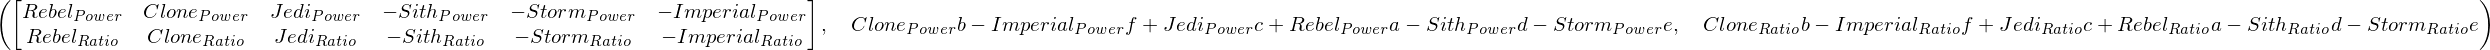

In [10]:
RP, CP, JP, SiP, SP, IP, RR, CR, JR, SiR, SR, IR, a, b, c, d, e, f = sym.symbols("Rebel_Power Clone_Power Jedi_Power Sith_Power Storm_Power Imperial_Power Rebel_Ratio Clone_Ratio Jedi_Ratio Sith_Ratio Storm_Ratio Imperial_Ratio a b c d e f")

pwr_eqn = a * RP + b * CP + c * JP - d * SiP - e * SP - f * IP
Rtio_eqn = a * RR + b * CR + c * JR - d * SiR - e * SR - f * IR

M = sym.Matrix([[RP, CP, JP, -SiP, -SP, -IP], [RR, CR, JR, -SiR, -SR, -IR]])
M, pwr_eqn, Rtio_eqn

In [6]:
r = sym.symbols("r")
c = sym.symbols("c")

A = sym.Matrix([[10, 7, 3, -1, -7, -10], [r, c, 100, -2, -500, -20345]])
B = sym.Matrix([[0], [0]])
linear_matrix, null = A.gauss_jordan_solve(B)

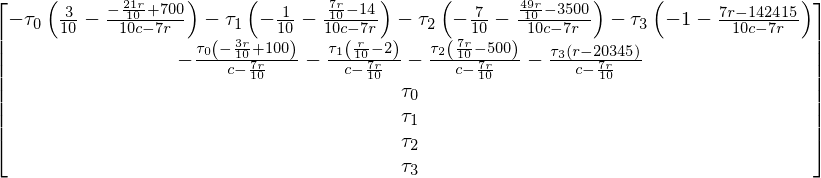

In [8]:
linear_matrix

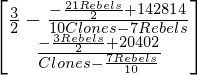

In [46]:
C = sym.Matrix([[10, 7], [r, c]])
D = sym.Matrix([[15], [20402]])
F, null2 = C.gauss_jordan_solve(D)
F

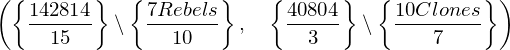

In [47]:
lin_reb_sol = sym.solveset(F[1, 0] , r)
lin_cln_sol = sym.solveset(F[0, 0] , c)
lin_cln_sol, lin_reb_sol

# Data Analysis

In [24]:
Rebellion_Data_sorting = sorted(list(zip(Clones_amount, Rebels_amount))) #by storing the data as a single list it can be sorted whilst keeping pairs together
Sorted_Clone_data, Sorted_Rebel_data = zip(*Rebellion_Data_sorting) #combines both data into a list

f = [(142814 / 15) for i in range(len(Sorted_Rebel_data) + 1)] 
g = [(40804 / 3) for i in range(len(Sorted_Clone_data) + 1)] 


In [37]:
print("Maximum, minimum amount of clones used:", max(Clones_amount),",",min(Clones_amount))
print("Range:", max(Clones_amount) - min(Clones_amount))
print("Approx. Median:", Sorted_Clone_data[int(len(Sorted_Clone_data) / 2)])
print("Mean:", sum(Sorted_Clone_data) / len(Sorted_Clone_data))

Maximum, minimum amount of clones used: 7467 , 7224
Range: 243
Approx. Median: 7317
Mean: 7342.909090909091


In [39]:
print("Maximum, minimum amount of Rebels used:", max(Rebels_amount),",",min(Rebels_amount))
print("Range:", max(Rebels_amount) - min(Rebels_amount))
print("Approx. Median:", Sorted_Rebel_data[int(len(Sorted_Rebel_data) / 2)])
print("Mean:", sum(Sorted_Rebel_data) / len(Sorted_Rebel_data))

Maximum, minimum amount of Rebels used: 10226 , 9832
Range: 394
Approx. Median: 10097
Mean: 10049.454545454546


In [43]:
print(142814 / 15) #linear solution of Clones
print(40804 / 3) #Linear solution of Rebels

9520.933333333332
13601.333333333334


# Graphs

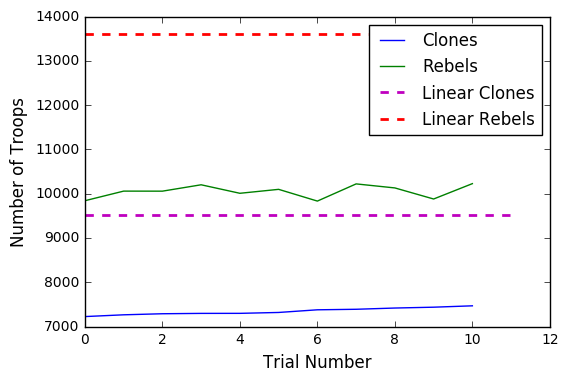

In [25]:
plt.plot(Sorted_Clone_data, color="b", label = 'Clones')
plt.plot(Sorted_Rebel_data, color="g", label = 'Rebels')
plt.plot(f, linestyle='--', color='m', linewidth=2, label = 'Linear Clones')
plt.plot(g, linestyle='--', color='r', linewidth=2, label = 'Linear Rebels')
plt.ylabel('Number of Troops', fontsize=12)
plt.xlabel('Trial Number', fontsize=12)
plt.legend(loc = 'best')
plt.savefig('Line Graph.png', bbox_inches='tight') #saves the graph without much white area around the image

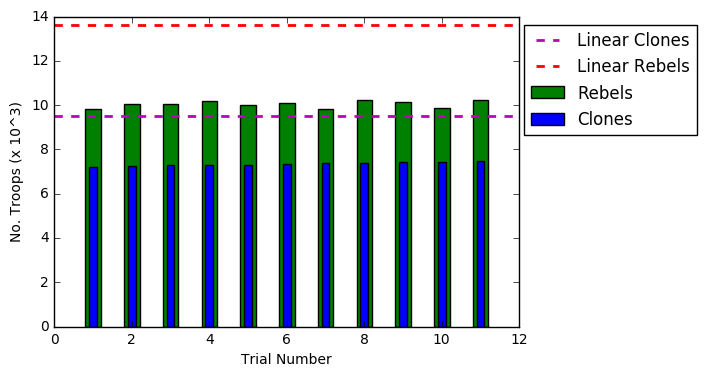

In [23]:
multiple_bars = plt.figure()

x_bar = [ i + 1 for i in range(len(Sorted_Clone_data))]

y = [(i / 1000) for i in (Sorted_Clone_data)]
z = [(i / 1000) for i in (Sorted_Rebel_data)]
f = [(142814 / 15) / 1000 for i in range(len(Sorted_Rebel_data) + 2)] 
g = [(40804 / 3) / 1000 for i in range(len(Sorted_Clone_data) + 2)] 


#all below used for plotting onto the graph
ax = plt.subplot(111)
ax.bar(x_bar, z,width=0.4,color='g',align='center', label = 'Rebels')
ax.bar(x_bar, y,width=0.2,color='b',align='center', label = 'Clones')
ax.plot(f, linestyle='--', color='m', linewidth=2, label = 'Linear Clones')
ax.plot(g, linestyle='--', color='r', linewidth=2, label = 'Linear Rebels')

ax.set_ylabel('No. Troops (x 10^3)') #label y-axis
ax.set_xlabel('Trial Number') #label x-axis
ax.legend(loc = 'upper right') #creates a legend for the graph

plt.legend(bbox_to_anchor=(1.4, 1), bbox_transform=ax.transAxes) #moves the legend off the graph

plt.savefig('Bar_chart.png', bbox_inches='tight') #saves the graph without much white area around the image

plt.show()